### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
library(ggplot2)

In [22]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X       Start.Time          End.Time            Trip.Duration
1 5688089 2017-06-11 14:55:05 2017-06-11 15:08:21  795         
2 4096714 2017-05-11 15:30:11 2017-05-11 15:41:43  692         
3 2173887 2017-03-29 13:26:26 2017-03-29 13:48:31 1325         
4 3945638 2017-05-08 19:47:18 2017-05-08 19:59:01  703         
5 6208972 2017-06-21 07:49:16 2017-06-21 07:54:46  329         
6 1285652 2017-02-22 18:55:24 2017-02-22 19:12:03  998         
  Start.Station           End.Station            User.Type  Gender Birth.Year
1 Suffolk St & Stanton St W Broadway & Spring St Subscriber Male   1998      
2 Lexington Ave & E 63 St 1 Ave & E 78 St        Subscriber Male   1981      
3 1 Pl & Clinton St       Henry St & Degraw St   Subscriber Male   1987      
4 Barrow St & Hudson St   W 20 St & 8 Ave        Subscriber Female 1986      
5 1 Ave & E 44 St         E 53 St & 3 Ave        Subscriber Male   1992      
6 State St & Smith St     Bond St & Fulton St    Subscriber Male   1986

In [83]:
#Visualizing a small subset sample to identify any patterns/missing data
sample(ny)

months Gender End.Station                    Start.Time         
1     Jun    Male   W Broadway & Spring St         2017-06-11 14:55:05
2     May    Male   1 Ave & E 78 St                2017-05-11 15:30:11
3     Mar    Male   Henry St & Degraw St           2017-03-29 13:26:26
4     May    Female W 20 St & 8 Ave                2017-05-08 19:47:18
5     Jun    Male   E 53 St & 3 Ave                2017-06-21 07:49:16
6     Feb    Male   Bond St & Fulton St            2017-02-22 18:55:24
7     Mar    Male   Lafayette Ave & Fort Greene Pl 2017-03-06 16:22:53
8     Mar    Male   Broadway & Battery Pl          2017-03-07 07:42:24
9     Apr           Central Park S & 6 Ave         2017-04-02 08:02:36
10    Mar    Male   E 25 St & 2 Ave                2017-03-01 23:01:31
11    Apr           Little West St & 1 Pl          2017-04-02 14:37:20
12    Apr    Male   Liberty St & Broadway          2017-04-13 13:40:39
13    Apr    Male   Columbus Ave & W 72 St         2017-04-27 23:27:31
14    Feb    Male   E 47 St & Park Ave             2017-02-13 15:40:53
15    Feb    Male   Bushwick Ave & Powers St       2017-02-28 19:26:43
16    Jan    Male   W 17 St & 8 Ave                2017-01-11 11:30:30
17    Mar    Male   Johnson St & Gold St           2017-03-29 20:19:44
18    Jun    Female E 11 St & 2 Ave                2017-06-23 21:21:59
19    May    Male   E 72 St & York Ave             2017-05-24 08:53:32
20    Jan           W 45 St & 6 Ave                2017-01-01 13:32:39
21    Feb    Male   1 Ave & E 68 St                2017-02-18 13:29:08
22    Apr    Male   Washington Pl & Broadway       2017-04-27 09:44:35
23    Mar    Female Suffolk St & Stanton St        2017-03-09 11:15:39
24    Apr           Plaza St West & Flatbush Ave   2017-04-08 13:39:48
25    Apr    Male   Mott St & Prince St            2017-04-16 17:36:06
26    Apr    Female 1 Ave & E 68 St                2017-04-21 09:41:14
27    Apr    Male   Columbia St & Degraw St        2017-04-17 18:27:23
28    Mar    Female W 38 St & 8 Ave                2017-03-25 12:02:11
29    Apr    Male   Mott St & Prince St            2017-04-29 23:58:44
30    Jun    Male   9 Ave & W 45 St                2017-06-06 11:23:30
⋮     ⋮      ⋮      ⋮                              ⋮                  
54741 May    Male   3 St & Prospect Park West      2017-05-14 13:58:01
54742 Jun    Male   Greenwich St & Hubert St       2017-06-05 17:44:35
54743 Apr    Male   Little West St & 1 Pl          2017-04-30 12:22:15
54744 Apr    Male   W 15 St & 7 Ave                2017-04-17 11:50:15
54745 Jun    Male   W 21 St & 6 Ave                2017-06-20 11:06:16
54746 Jan    Male   Centre St & Worth St           2017-01-13 07:37:50
54747 Feb    Male   Vesey Pl & River Terrace       2017-02-22 16:00:25
54748 Apr    Male   E 3 St & 1 Ave                 2017-04-22 10:03:26
54749 May    Female S 3 St & Bedford Ave           2017-05-14 16:18:42
54750 Mar    Female Greenwich Ave & 8 Ave          2017-03-07 21:15:14
54751 Mar    Female Canal St & Rutgers St          2017-03-13 21:21:15
54752 Feb    Male   W 33 St & 7 Ave                2017-02-15 13:40:07
54753 Jun    Male   12 Ave & W 40 St               2017-06-10 12:31:08
54754 Apr    Male   Broadway & E 22 St             2017-04-23 10:54:11
54755 Jun    Female W 16 St & The High Line        2017-06-12 18:45:44
54756 May    Male   Great Jones St                 2017-05-31 22:00:22
54757 Apr    Male   Amsterdam Ave & W 79 St        2017-04-09 07:34:19
54758 May    Female E 17 St & Broadway             2017-05-04 12:03:54
54759 Jan    Male   Franklin St & W Broadway       2017-01-12 21:42:18
54760 Mar    Male   W 31 St & 7 Ave                2017-03-21 16:27:03
54761 Jun    Male   South End Ave & Liberty St     2017-06-21 12:44:04
54762 Jun    Male   South End Ave & Liberty St     2017-06-22 17:09:31
54763 Jun    Male   E 12 St & 3 Ave                2017-06-08 19:59:16
54764 Jun    Male   W 47 St & 10 Ave               2017-06-08 17:29:01
54765 Feb    Male   E 47 St & 

In [50]:
#Checking for null values
apply(is.na(ny), 2, sum)

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type        Gender    Birth.Year        months 
            0             0             0          5218             0

In [56]:
#Checking for null values
ny %>% summarise_all(funs(sum(is.na(.))))

X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type
1 0 0          0        1             0             0           0        
  Gender Birth.Year months
1 0      5218       0

In [3]:
head(wash)

X       Start.Time          End.Time            Trip.Duration
1 1621326 2017-06-21 08:36:34 2017-06-21 08:44:43  489.066     
2  482740 2017-03-11 10:40:00 2017-03-11 10:46:00  402.549     
3 1330037 2017-05-30 01:02:59 2017-05-30 01:13:37  637.251     
4  665458 2017-04-02 07:48:35 2017-04-02 08:19:03 1827.341     
5 1481135 2017-06-10 08:36:28 2017-06-10 09:02:17 1549.427     
6 1148202 2017-05-14 07:18:18 2017-05-14 07:24:56  398.000     
  Start.Station                              
1 14th & Belmont St NW                       
2 Yuma St & Tenley Circle NW                 
3 17th St & Massachusetts Ave NW             
4 Constitution Ave & 2nd St NW/DOL           
5 Henry Bacon Dr & Lincoln Memorial Circle NW
6 1st & K St SE                              
  End.Station                                         User.Type 
1 15th & K St NW                                      Subscriber
2 Connecticut Ave & Yuma St NW                        Subscriber
3 5th & K St NW                                       Subscriber
4 M St & Pennsylvania Ave NW                          Customer  
5 Maine Ave & 7th St SW                               Subscriber
6 Eastern Market Metro / Pennsylvania Ave & 7th St SE Subscriber

In [79]:
#Visualizing a small subset sample to identify any patterns/missing data
sample(wash)

Trip.Duration X      
1      489.066      1621326
2      402.549       482740
3      637.251      1330037
4     1827.341       665458
5     1549.427      1481135
6      398.000      1148202
7     1105.429      1594275
8      636.218      1601832
9      328.530       574182
10    1188.090       327058
11     866.689       854729
12    2385.411       721887
13     951.457       143181
14     448.628        26953
15    2039.472      1308542
16     505.482      1592744
17    1591.326      1139713
18    1672.075      1478516
19     231.952       679837
20    2291.454      1392498
21    1261.363       746605
22    2964.818       868881
23     825.590      1161275
24     226.006       305000
25     920.840      1174029
26    1371.512      1157984
27     254.076       694527
28     834.780       228536
29    7427.749       669432
30    1165.698      1036255
⋮     ⋮             ⋮      
89022  779.371       676408
89023  275.761       551347
89024  456.235       905153
89025 2692.475       625949
89026  244.334      1667242
89027  468.211       241483
89028  564.069       893870
89029 2560.164      1673660
89030  707.024       531841
89031 1997.738      1143611
89032 1136.869       760548
89033 2817.361       585303
89034  518.196       774610
89035  815.682      1681261
89036  360.841      1068808
89037  543.352       385427
89038  577.966       242173
89039 1385.731       982818
89040 1253.775      1742606
89041  417.479      1583466
89042 1104.388      1500573
89043 1474.546        45867
89044  978.056      1534964
89045  732.245      1371409
89046 1669.700      1484340
89047 1082.789       555788
89048  571.879       739004
89049  404.152      1214907
89050 1345.911      1419806
NA          NA           NA
      End.Station                                           User.Type  months
1     15th & K St NW                                        Subscriber Jun   
2     Connecticut Ave & Yuma St NW                          Subscriber Mar   
3     5th & K St NW                                         Subscriber May   
4     M St & Pennsylvania Ave NW                            Customer   Apr   
5     Maine Ave & 7th St SW                                 Subscriber Jun   
6     Eastern Market Metro / Pennsylvania Ave & 7th St SE   Subscriber May   
7     8th & H St NW                                         Subscriber Jun   
8     Potomac & Pennsylvania Ave SE                         Subscriber Jun   
9     15th & P St NW                                        Subscriber Mar   
10    Lynn & 19th St North                                  Subscriber Feb   
11    37th & O St NW / Georgetown University                Customer   Apr   
12    5th St & Massachusetts Ave NW                         Customer   Apr   
13    1st & Rhode Island Ave NW                             Subscriber Jan   
14    1st & M St NE                                         Subscriber Jan   
15    Lincoln Memorial                                      Customer   May   
16    North Capitol St & G Pl NE                            Subscriber Jun   
17    New York Ave & 15th St NW                             Customer   May   
18    15th & East Capitol St NE                             Subscriber Jun   
19    6th & S Ball St                                       Subscriber Apr   
20    Lamont & Mt Pleasant NW                               Customer   Jun   
21    Smithsonian-National Mall / Jefferson Dr & 12th St SW Customer   Apr   
22    Congress Heights Metro                                Subscriber Apr   
23    Oklahoma Ave & D St NE                                Subscriber May   
24    Calvert St & Woodley Pl NW                            Subscriber Feb   
25    L'Enfant Plaza / 7th & C St SW                        Subscriber May   
26    Arlington Blvd & Fillmore St                          Subscriber May   
27    11th & M St NW                                        Subscriber Apr   
28    Massachusetts Ave & Dupont Circle NW                  Subscriber Feb   
29    2n

In [47]:
#Checking for null values in wash dataset
apply(is.na(wash), 2, sum)


X    Start.Time      End.Time Trip.Duration Start.Station 
            1             1             1             1             1 
  End.Station     User.Type        months 
            1             1             1

In [57]:
#Checking for null values
wash %>% summarise_all(funs(sum(is.na(.))))

X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type
1 1 1          1        1             1             1           1        
  months
1 1

In [4]:
head(chi)

X       Start.Time          End.Time            Trip.Duration
1 1423854 2017-06-23 15:09:32 2017-06-23 15:14:53  321         
2  955915 2017-05-25 18:19:03 2017-05-25 18:45:53 1610         
3    9031 2017-01-04 08:27:49 2017-01-04 08:34:45  416         
4  304487 2017-03-06 13:49:38 2017-03-06 13:55:28  350         
5   45207 2017-01-17 14:53:07 2017-01-17 15:02:01  534         
6 1473887 2017-06-26 09:01:20 2017-06-26 09:11:06  586         
  Start.Station                 End.Station                  User.Type  Gender
1 Wood St & Hubbard St          Damen Ave & Chicago Ave      Subscriber Male  
2 Theater on the Lake           Sheffield Ave & Waveland Ave Subscriber Female
3 May St & Taylor St            Wood St & Taylor St          Subscriber Male  
4 Christiana Ave & Lawrence Ave St. Louis Ave & Balmoral Ave Subscriber Male  
5 Clark St & Randolph St        Desplaines St & Jackson Blvd Subscriber Male  
6 Clinton St & Washington Blvd  Canal St & Taylor St         Subscriber Male  
  Birth.Year
1 1992      
2 1992      
3 1981      
4 1986      
5 1975      
6 1990

In [80]:
#Visualizing a small subset sample to identify any patterns/missing data
sample(chi)

Start.Station                  Start.Time          Trip.Duration
1    Wood St & Hubbard St           2017-06-23 15:09:32  321         
2    Theater on the Lake            2017-05-25 18:19:03 1610         
3    May St & Taylor St             2017-01-04 08:27:49  416         
4    Christiana Ave & Lawrence Ave  2017-03-06 13:49:38  350         
5    Clark St & Randolph St         2017-01-17 14:53:07  534         
6    Clinton St & Washington Blvd   2017-06-26 09:01:20  586         
7    Ashland Ave & Lake St          2017-05-26 09:41:44  281         
8    Larrabee St & Kingsbury St     2017-01-21 14:28:38  723         
9    Sedgwick St & Huron St         2017-04-20 16:08:51  689         
10   Stetson Ave & South Water St   2017-02-06 18:00:47  493         
11   Broadway & Barry Ave           2017-02-15 07:09:55  301         
12   Southport Ave & Wellington Ave 2017-01-22 15:15:45  917         
13   Green St & Madison St          2017-01-08 16:03:00  277         
14   Larrabee St & Kingsbury St     2017-05-30 15:46:18  354         
15   Canal St & Madison St          2017-04-20 19:26:33  515         
16   Clark St & Armitage Ave        2017-05-25 22:59:33  466         
17   Ada St & Washington Blvd       2017-05-03 13:20:38  635         
18   Damen Ave & Cortland St        2017-05-23 08:08:25  164         
19   State St & Pearson St          2017-06-25 21:26:30  434         
20   Adler Planetarium              2017-04-08 11:37:55  840         
21   Michigan Ave & Oak St          2017-05-16 06:36:17 1397         
22   Rush St & Cedar St             2017-06-23 12:21:01  713         
23   Clarendon Ave & Leland Ave     2017-02-12 15:24:29  854         
24   Bissell St & Armitage Ave      2017-06-22 19:14:37  917         
25   Wabash Ave & Roosevelt Rd      2017-05-03 09:41:11  479         
26   Rush St & Cedar St             2017-06-24 20:47:40 1559         
27   Loomis St & Jackson Blvd       2017-03-23 09:38:27  254         
28   Canal St & Madison St          2017-06-09 07:48:55  215         
29   Clinton St & Lake St           2017-04-11 18:49:57  579         
30   Halsted St & Dickens Ave       2017-02-25 19:01:19  411         
⋮    ⋮                              ⋮                   ⋮            
8601 Michigan Ave & Oak St          2017-06-08 10:41:48  921         
8602 Streeter Dr & Grand Ave        2017-06-20 14:05:16  747         
8603 Shedd Aquarium                 2017-04-15 15:45:09 1571         
8604 Streeter Dr & Grand Ave        2017-02-22 15:28:34  604         
8605 Rush St & Superior St          2017-02-19 20:01:24  410         
8606 Lake Shore Dr & North Blvd     2017-06-22 13:15:06 3309         
8607 Milwaukee Ave & Grand Ave      2017-05-30 09:03:01  492         
8608 Ritchie Ct & Banks St          2017-06-29 07:19:56 1342         
8609 Burnham Harbor                 2017-06-25 16:43:18  944         
8610 Dearborn St & Adams St         2017-02-23 13:21:52  165         
8611 Fort Dearborn Dr & 31st St     2017-02-23 16:31:20  357         
8612 Michigan Ave & Madison St      2017-02-10 13:16:59  325         
8613 Streeter Dr & Grand Ave        2017-02-25 12:15:05 1056         
8614 Normal Ave & Archer Ave        2017-04-20 08:43:13  243         
8615 Clinton St & Madison St        2017-05-09 08:50:46  275         
8616 Calumet Ave & 18th St          2017-04-20 07:29:58 1176         
8617 Pine Grove Ave & Waveland Ave  2017-06-13 07:11:51 1157         
8618 Canal St & Madison St          2017-01-19 07:49:35  234         
8619 Canal St & Adams St            2017-06-20 17:05:11 1693         
8620 Wabash Ave & Wacker Pl         2017-06-21 20:06:34 1116         
8621 Theater on the Lake            2017-05-31 11:33:16 2255         
8622 Eckhart Park                   2017-06-06 07:19:45  869         
8623 Daley Center Plaza             2017-06-23 16:23:14  531         
8624 Millennium Park                2017-01-03 17:35:11  395         
8625 Southport Ave & Waveland Ave   2017-03-24 16:52:16  341         
8626 Artesian A

In [49]:
#Checking for null values
apply(is.na(chi), 2, sum)

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             0             0 
  End.Station     User.Type        Gender    Birth.Year        months 
            0             0             0          1747             0

In [58]:
#Checking for null values
chi %>% summarise_all(funs(sum(is.na(.))))

X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type
1 0 0          0        0             0             0           0        
  Gender Birth.Year months
1 0      1747       0

In [10]:
sapply(list("Chicago" = chi,"New York" = ny,"Washington" = wash), glimpse)

Observations: 8,630
Variables: 9
$ X             <int> 1423854, 955915, 9031, 304487, 45207, 1473887, 961916, …
$ Start.Time    <fct> 2017-06-23 15:09:32, 2017-05-25 18:19:03, 2017-01-04 08…
$ End.Time      <fct> 2017-06-23 15:14:53, 2017-05-25 18:45:53, 2017-01-04 08…
$ Trip.Duration <int> 321, 1610, 416, 350, 534, 586, 281, 723, 689, 493, 301,…
$ Start.Station <fct> Wood St & Hubbard St, Theater on the Lake, May St & Tay…
$ End.Station   <fct> Damen Ave & Chicago Ave, Sheffield Ave & Waveland Ave, …
$ User.Type     <fct> Subscriber, Subscriber, Subscriber, Subscriber, Subscri…
$ Gender        <fct> Male, Female, Male, Male, Male, Male, Female, , Male, M…
$ Birth.Year    <dbl> 1992, 1992, 1981, 1986, 1975, 1990, 1983, NA, 1984, 197…
Observations: 54,770
Variables: 9
$ X             <int> 5688089, 4096714, 2173887, 3945638, 6208972, 1285652, 1…
$ Start.Time    <fct> 2017-06-11 14:55:05, 2017-05-11 15:30:11, 2017-03-29 13…
$ End.Time      <fct> 2017-06-11 15:08:21, 2017-05-11 15:41:43, 

$Chicago
           X          Start.Time            End.Time Trip.Duration
1    1423854 2017-06-23 15:09:32 2017-06-23 15:14:53           321
2     955915 2017-05-25 18:19:03 2017-05-25 18:45:53          1610
3       9031 2017-01-04 08:27:49 2017-01-04 08:34:45           416
4     304487 2017-03-06 13:49:38 2017-03-06 13:55:28           350
5      45207 2017-01-17 14:53:07 2017-01-17 15:02:01           534
6    1473887 2017-06-26 09:01:20 2017-06-26 09:11:06           586
7     961916 2017-05-26 09:41:44 2017-05-26 09:46:25           281
8      65924 2017-01-21 14:28:38 2017-01-21 14:40:41           723
9     606841 2017-04-20 16:08:51 2017-04-20 16:20:20           689
10    135470 2017-02-06 18:00:47 2017-02-06 18:09:00           493
11    175805 2017-02-15 07:09:55 2017-02-15 07:14:56           301
12     71678 2017-01-22 15:15:45 2017-01-22 15:31:02           917
13     19061 2017-01-08 16:03:00 2017-01-08 16:07:37           277
14   1023296 2017-05-30 15:46:18 2017-05-30 15:52:12           354
15    611000 2017-04-20 19:26:33 2017-04-20 19:35:08           515
16    958716 2017-05-25 22:59:33 2017-05-25 23:07:19           466
17    718598 2017-05-03 13:20:38 2017-05-03 13:31:13           635
18    931608 2017-05-23 08:08:25 2017-05-23 08:11:09           164
19   1469705 2017-06-25 21:26:30 2017-06-25 21:33:44           434
20    475456 2017-04-08 11:37:55 2017-04-08 11:51:55           840
21    849468 2017-05-16 06:36:17 2017-05-16 06:59:34          1397
22   1420915 2017-06-23 12:21:01 2017-06-23 12:32:54           713
23    161454 2017-02-12 15:24:29 2017-02-12 15:38:43           854
24   1413814 2017-06-22 19:14:37 2017-06-22 19:29:54           917
25    717248 2017-05-03 09:41:11 2017-05-03 09:49:10           479
26   1451810 2017-06-24 20:47:40 2017-06-24 21:13:39          1559
27    385517 2017-03-23 09:38:27 2017-03-23 09:42:41           254
28   1186035 2017-06-09 07:48:55 2017-06-09 07:52:30           215
29    512692 2017-04-11 18:49:57 2017-04-11 18:59:36           579
30    261757 2017-02-25 19:01:19 2017-02-25 19:08:10           411
31    952396 2017-05-25 16:06:09 2017-05-25 16:12:49           400
32   1539334 2017-06-30 10:56:50 2017-06-30 11:40:20          2610
33   1359055 2017-06-19 17:43:17 2017-06-19 17:59:35           978
34   1187843 2017-06-09 09:08:19 2017-06-09 09:15:09           410
35    389463 2017-03-23 20:50:57 2017-03-23 20:57:19           382
36    243879 2017-02-22 15:33:56 2017-02-22 15:54:07          1211
37    165328 2017-02-13 14:17:25 2017-02-13 14:22:52           327
38    395803 2017-03-24 15:35:55 2017-03-24 15:46:10           615
39    720062 2017-05-03 16:27:08 2017-05-03 16:45:15          1087
40     93723 2017-01-26 19:45:41 2017-01-26 19:59:31           830
41   1314009 2017-06-16 19:34:44 2017-06-16 20:16:23          2499
42    601870 2017-04-20 07:47:23 2017-04-20 08:03:35           972
43    814960 2017-05-13 14:39:17 2017-05-13 14:40:40            83
44    915409 2017-05-22 05:49:43 2017-05-22 05:51:15            92
45   1372709 2017-06-20 16:14:15 2017-06-20 16:42:26          1691
46   1319064 2017-06-17 10:41:19 2017-06-17 10:55:32           853
47    461905 2017-04-06 14:58:44 2017-04-06 15:04:26           342
48    371076 2017-03-20 21:27:24 2017-03-20 21:39:02           698
49    906322 2017-05-21 10:03:55 2017-05-21 10:18:17           862
50    141745 2017-02-08 07:13:31 2017-02-08 07:16:17           166
51    629006 2017-04-22 19:12:25 2017-04-22 19:15:41           196
52    724597 2017-05-04 05:46:01 2017-05-04 06:07:56          1315
53    157790 2017-02-11 15:11:34 2017-02-11 16:30:04          4710
54    959864 2017-05-26 07:31:20 2017-05-26 07:38:57           457
55    702079 2017-05-01 08:35:17 2017-05-01 08:49:02           825
56    239793 2017-02-22 07:51:44 2017-02-22 08:00:14           510
57   1526760 2017-06-29 13:50:47 2017-06-29 14:10:04          1157
58    697597 2017-04-29 09:46:00 2017-04-29 10:14:37          1717
59    265806 2017-02-27 07:20:11 2017-

In [7]:
#Summary statistics for each dataset
sapply(list("Chicago" = chi,"New York" = ny,"Washington"  =  wash), summary)

$Chicago
       X                         Start.Time                  End.Time   
 Min.   :     36   2017-01-24 07:40:32:   2   2017-04-16 13:16:52:   2  
 1st Qu.: 386722   2017-04-22 13:16:25:   2   2017-04-26 16:29:26:   2  
 Median : 773554   2017-05-27 15:17:50:   2   2017-05-21 16:20:56:   2  
 Mean   : 776721   2017-06-10 13:29:41:   2   2017-05-27 09:58:21:   2  
 3rd Qu.:1171266   2017-06-20 17:05:11:   2   2017-06-25 14:51:35:   2  
 Max.   :1551248   2017-06-21 13:18:52:   2   2017-01-01 00:46:32:   1  
                   (Other)            :8618   (Other)            :8619  
 Trip.Duration                          Start.Station 
 Min.   :   60.0   Streeter Dr & Grand Ave     : 210  
 1st Qu.:  394.2   Lake Shore Dr & Monroe St   : 140  
 Median :  670.0   Clinton St & Washington Blvd: 120  
 Mean   :  937.2   Clinton St & Madison St     : 102  
 3rd Qu.: 1119.0   Canal St & Adams St         : 101  
 Max.   :85408.0   Michigan Ave & Oak St       :  98  
                   (Ot

### Question 1


What months are the busiest for each city?

In [ ]:
# Your solution code goes here

The as.Date function is used to convert the values in the Start.Time column to dates.
The months function is used to extract the month names from the dates. The abbreviate argument is set to TRUE, which means that the month names will be abbreviated (e.g., "Jan" for January).
The month names are then assigned to the months column in each of the data frames using the assignment operator <-.

In [4]:
#The as.Date function is used to convert the values in the Start.Time column to dates. 
#The months function is used to extract the month names from the dates. 
#The abbreviate argument is set to TRUE, which means that the month names will be abbreviated (e.g., "Jan" for January). 
#The month names are then assigned to the months column in each of the data frames using the assignment operator <-.
ny$months <- months(as.Date(ny$Start.Time), abbreviate=TRUE)
wash$months <- months(as.Date(wash$Start.Time), abbreviate=TRUE)
chi$months <- months(as.Date(chi$Start.Time), abbreviate=TRUE)

In [5]:
#Creates labels for the columns
ny$months <- factor(ny$months, levels = c("Jan", "Feb", "Mar", "Apr", "May","Jun"))
wash$months <- factor(wash$months, levels = c("Jan", "Feb", "Mar", "Apr","May", "Jun"))
chi$months <- factor(chi$months, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun"))


In [27]:
#Creates table summary for New York by month
table(ny$months)  


  Jan   Feb   Mar   Apr   May   Jun 
 5745  6364  5820 10661 12180 14000 

In [43]:
#Creates table summary for Washington, DC by month
table(wash$months)


  Jan   Feb   Mar   Apr   May   Jun 
 8946 11563 12612 18522 17072 20335 

In [36]:
#Creates table summary for Chicago by month
table(chi$months)


 Jan  Feb  Mar  Apr  May  Jun 
 650  930  803 1526 1905 2816 

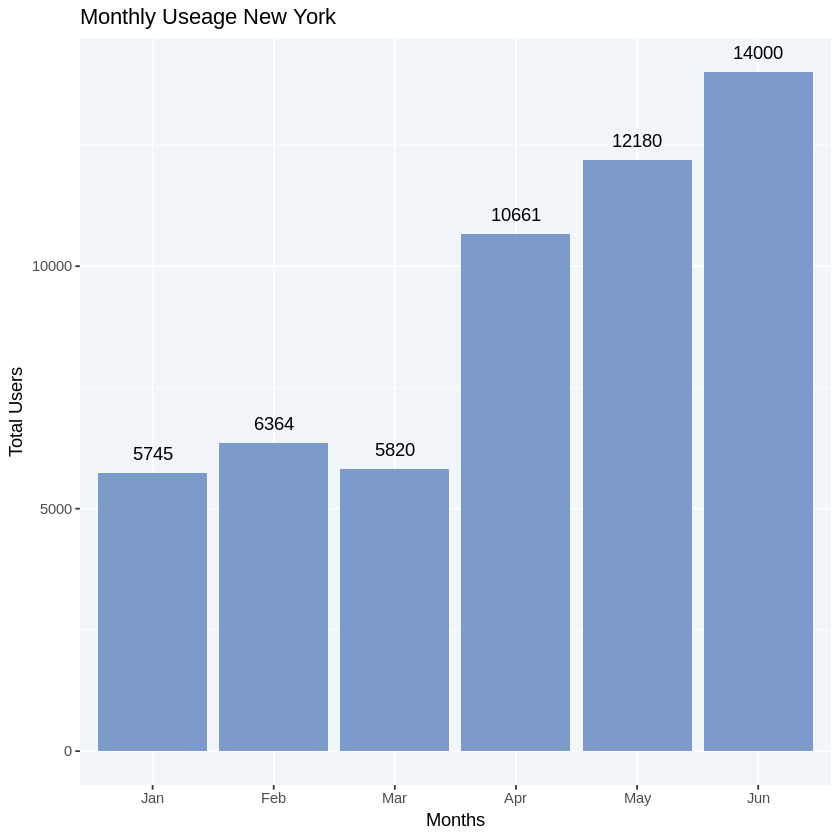

In [69]:
#Bar chart showing the Monthly Useage for New York City
ny_usage <- ggplot(ny, aes(x=ny$months)) +
  geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "Months", y = "Total Users", title = "Monthly Useage New York") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
ny_usage


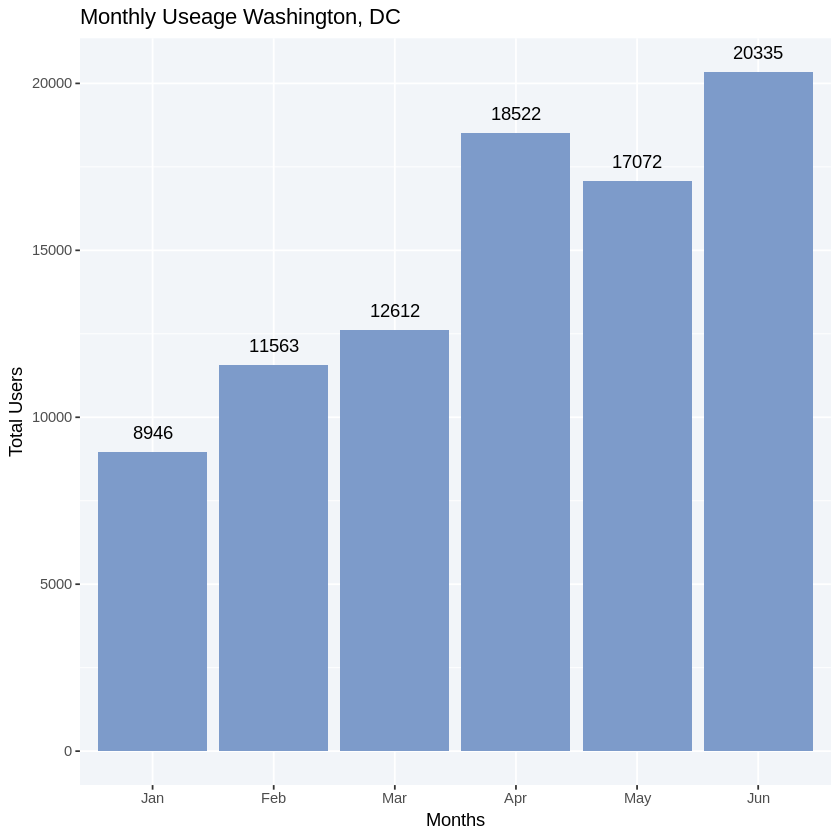

In [8]:
#Bar chart showing the Monthly Useage for Washington DC
wash <- dplyr::filter(wash, !is.na(months))

wash_usage <- ggplot(wash, aes(x=wash$months)) +
  geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "Months", y = "Total Users", title = "Monthly Useage Washington, DC") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
wash_usage



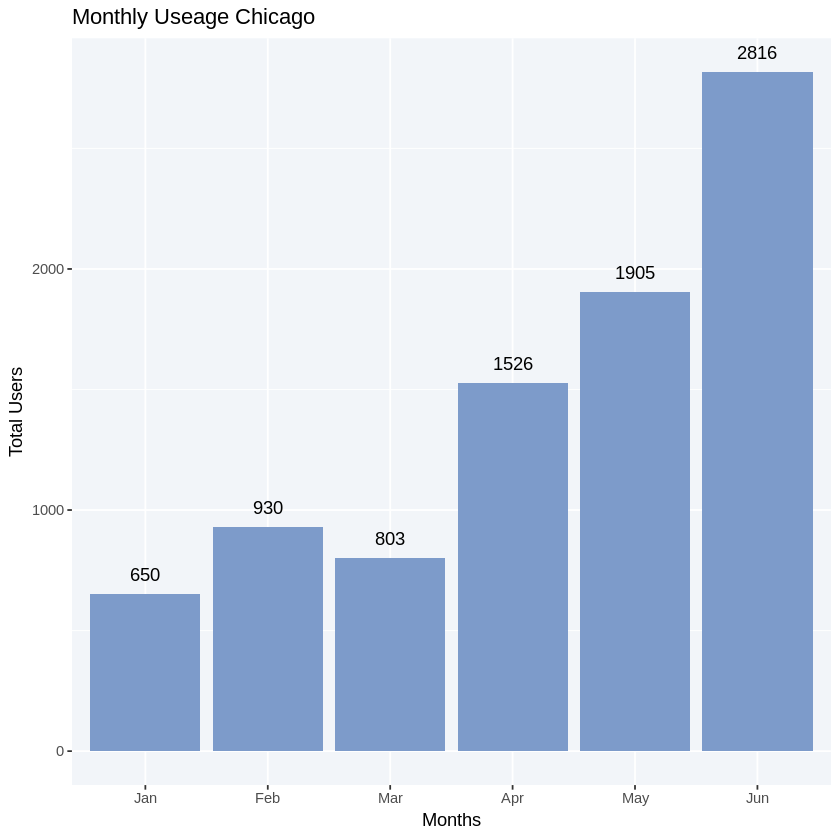

In [71]:
chi_usage  <- ggplot(chi, aes(x=chi$months)) +
  geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "Months", y = "Total Users", title = "Monthly Useage Chicago") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
chi_usage  

**Summary of your question 1 results goes here.** <br>
For each city June was the busiest month for bike rentals. <br>
New York had 14,000 users in June, Washington, DC had 20,335 in June and Chicago had 2,816 in June

### Question 2

What is the user breakdown of people renting bikes. Are they subscribers to the service or single ride customers?


In [ ]:
# Your solution code goes here

In [85]:
table(ny$User.Type)


             Customer Subscriber 
       119       5558      49093 

In [86]:
prop.table(table(ny$User.Type))


               Customer  Subscriber 
0.002172722 0.101478912 0.896348366 

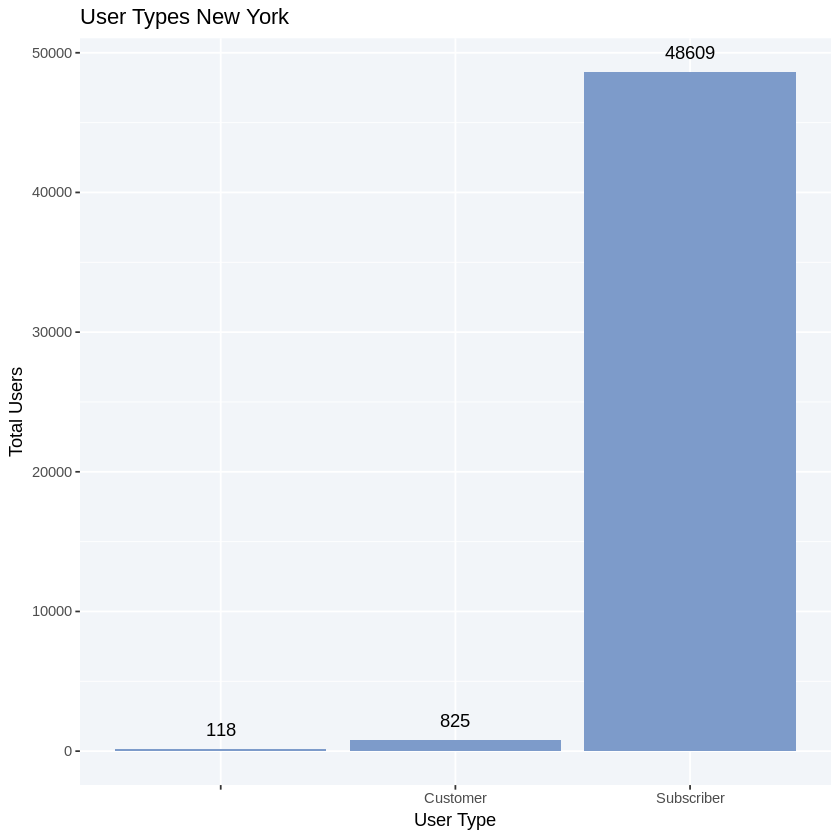

In [17]:
ny <- na.omit(ny)
ny_users <- ggplot(data=ny, aes(x=ny$User.Type)) +
        geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "User Type", y = "Total Users", title = "User Types New York") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
ny_users



In [87]:
table(wash$User.Type)


             Customer Subscriber 
         0      23450      65600 

In [88]:
prop.table(table(wash$User.Type))


             Customer Subscriber 
 0.0000000  0.2633352  0.7366648 

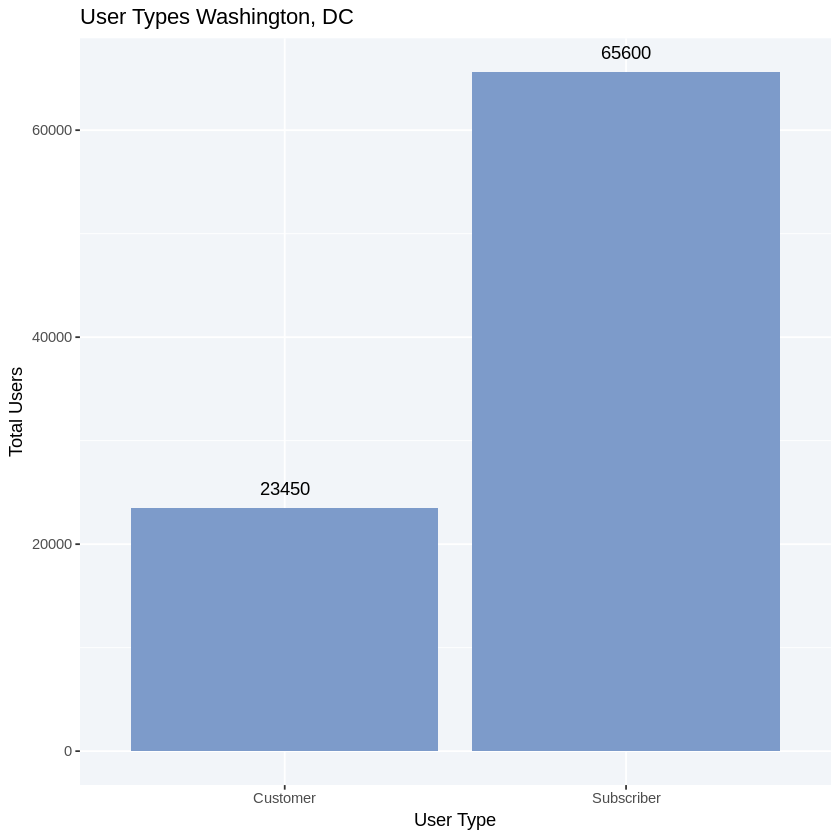

In [9]:
wash <- na.omit(wash)

wash_users <- ggplot(data=wash, aes(x=User.Type)) +
  geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "User Type", y = "Total Users", title = "User Types Washington, DC") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
wash_users


In [94]:
table(chi$User.Type)


             Customer Subscriber 
         1       1746       6883 

In [93]:
prop.table(table(chi$User.Type))


                 Customer   Subscriber 
0.0001158749 0.2023174971 0.7975666280 

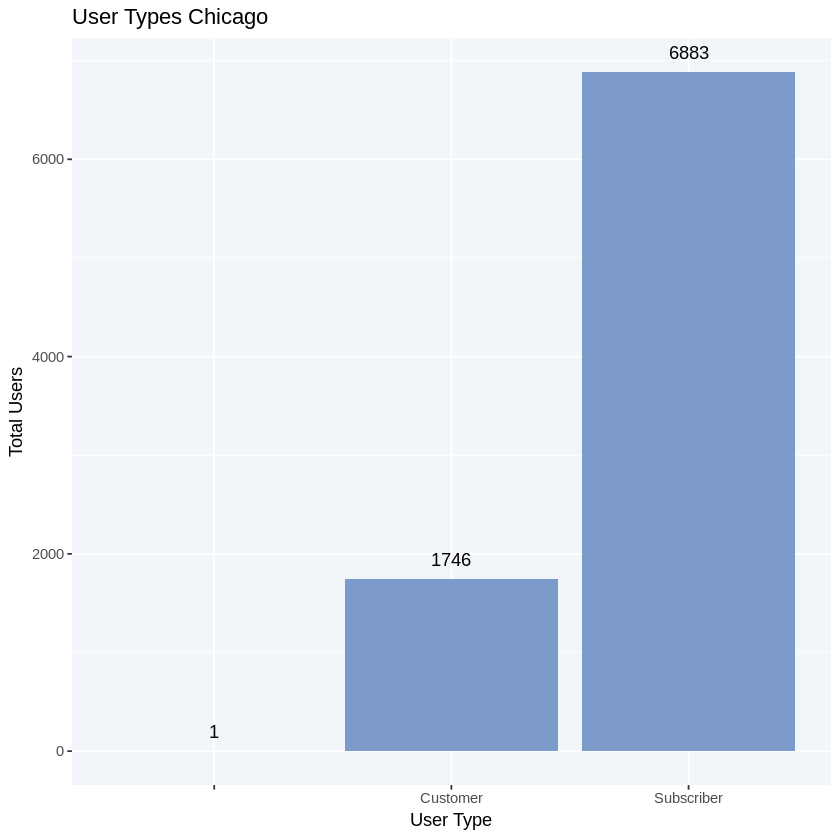

In [23]:
chi_users <- ggplot(data=chi, aes(x=chi$User.Type)) +
        geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "User Type", y = "Total Users", title = "User Types Chicago") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
chi_users


**Summary of your question 2 results goes here.**<br>
For each city more subscribers than users rented bikes. <br>
In New York 3,558 were single ride customers and 49,093 were subscribers. There were 119 records without subscriber/customer information. <br>
In Washington, DC 23,450 were single ride customers and 65,600 were subscribers. There was one NA value. <br>
In Chicago 1746 were customers and 6883 were subscribers. There was one unknown value.

### Question 3

What are the counts of each gender (only available for NYC and Chicago)?

In [ ]:
# Your solution code goes here

In [18]:
table(ny$Gender)


       Female   Male 
   193  12158  37201 

In [90]:
prop.table(table(ny$Gender))



             Female      Male 
0.0987767 0.2220011 0.6792222 

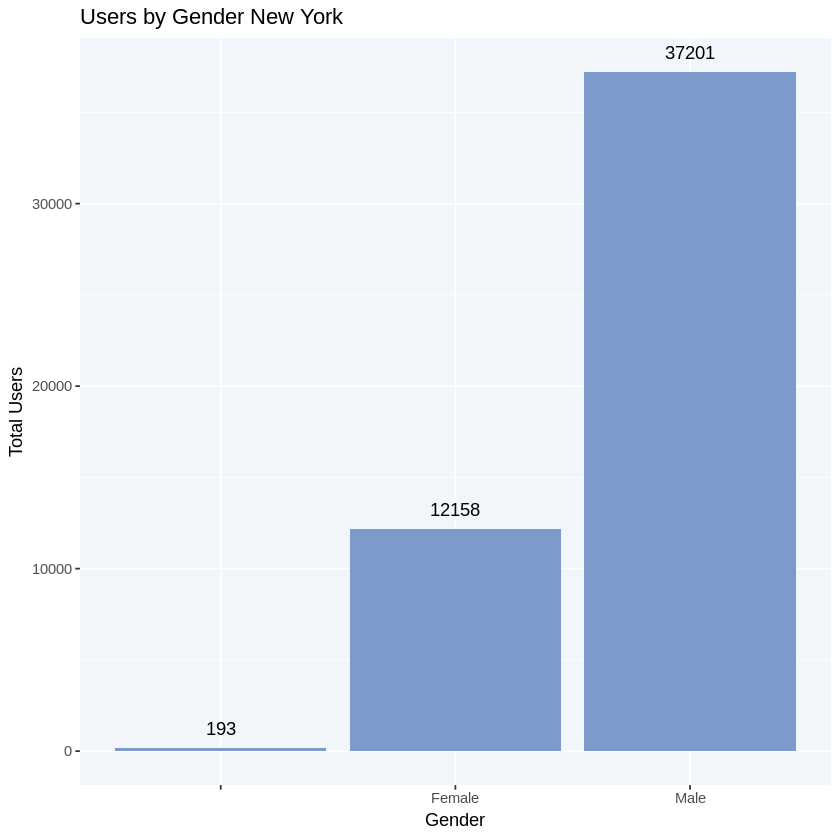

In [19]:
ny_gender <- ggplot(data=ny, aes(x=ny$Gender)) +
        geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "Gender", y = "Total Users", title = "Users by Gender New York") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
ny_gender

In [92]:
table(chi$Gender)


       Female   Male 
  1748   1723   5159 

In [91]:
prop.table(table(chi$Gender))



             Female      Male 
0.2025492 0.1996524 0.5977984 

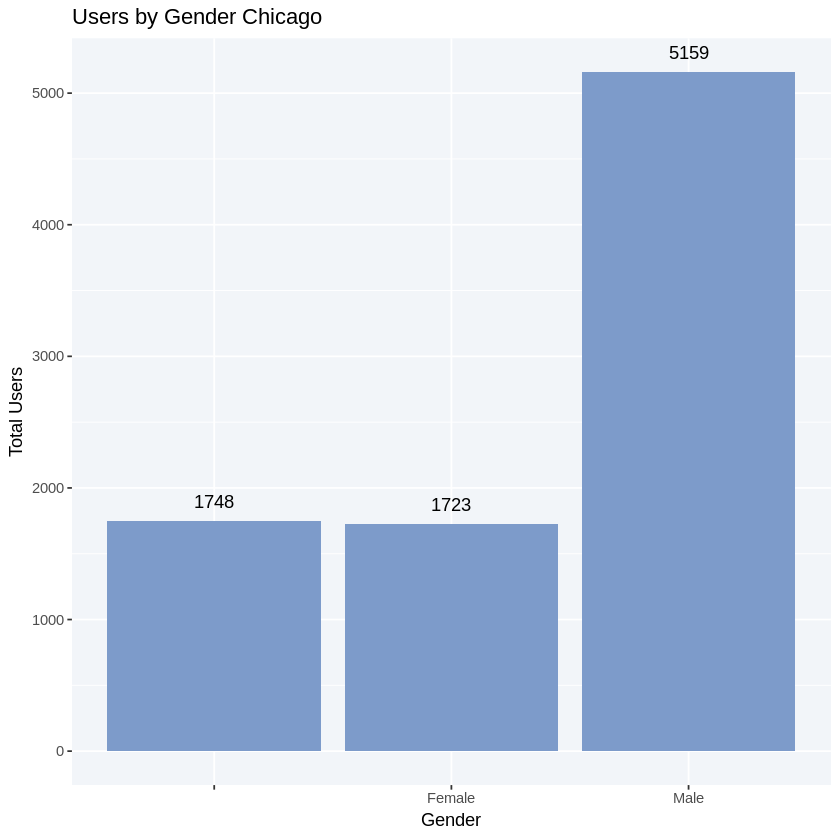

In [75]:
chi_gender <- ggplot(data=chi, aes(x=chi$Gender)) +
        geom_bar(stat="count", fill = "#7D9BCA") +   geom_text(
    stat = "count",
    aes(label = ..count..), vjust = -1, 
  ) + 
labs(x = "Gender", y = "Total Users", title = "Users by Gender Chicago") +
theme(panel.background = element_rect(fill = "#f2f5f9"), text = element_text(color = "Black"))
chi_gender

**Summary of your question 3 results goes here.**<br>
In New York 37201 users were male 12159 were female and 5410 had a unknown gender type (the dataset contained blank values)
In Chicago 5159 users were male 1723 were female and 1748 had a unknown gender type (the dataset contained blank values)


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')